In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Tuple

In [2]:
# experiment_folder = "/home/kenzo/experiments/alexnet-pretrained-50ep/"
# experiment_folder = "/home/kenzo/experiments/resnet18-pretrained-50ep/"
# experiment_folder = "/home/kenzo/experiments/vggnet11pretrained-50ep/"
# experiment_folder = "/home/kenzo/experiments/vggnet11pretrained-50ep/"
experiment_folder = "/home/kenzo/experiments/alexnet-pretrained-super_aug-200ep/"


# Loss final de cada fold

In [3]:
summarized_fold_info_df = pd.read_csv(experiment_folder + "fold_metrics.csv")
summarized_fold_info_df.set_index("fold", inplace=True)


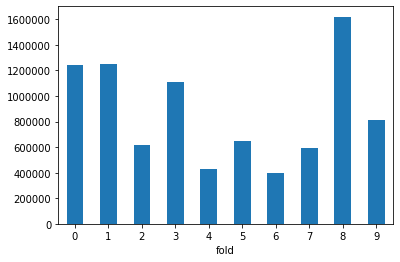

In [4]:
summarized_fold_info_df["loss"].plot.bar(rot=0)

# Predições

In [5]:
def scatter_plot_and_save(experiment_name: str,
                          real: Tuple,
                          pred: Tuple) -> None:

    plt.figure()

    # controls default text sizes
    # plt.rc('font', size=16)          

    # hard-coding axis' max values [xmin, xmax, ymin, ymax]
    # plt.axis([0, 15000, 0, 17500])

    plt.xlabel("REAL")
    plt.ylabel("PREDICTION")

    plt.plot(real, pred, 'co')    
    dashes = [5, 5, 5, 5]
    
    plt.plot(real, real, dashes=dashes, color="#cccccc")

In [6]:
import matplotlib.patches as mpatches 
import numpy as np

def calc_intersections(hist1, hist2) -> float:
    s = 0
    for p in zip(hist1, hist2):
        s += min(p)
    
    return s

def plot_and_save_histogram(experiment_name: str,
                            real: Tuple, 
                            pred: Tuple, 
                            bins: int, 
                            weights=None) -> None:
    plt.figure()
   
    weights = np.ones(len(real)) / len(real)

    range_min = min(np.min(real), np.min(pred))
    range_max = max(np.max(real), np.max(pred))

    full_range = (range_min, range_max)

    n1, bins, _ = plt.hist(real, bins=bins,
                                 range=full_range,
                                 weights=weights, 
                                 facecolor="#34a2eb",
                                 edgecolor="#2c5aa3",
                                 alpha=0.9)
    
    n2, bins, _ = plt.hist(pred, bins=bins, 
                                 range=full_range,
                                 weights=weights,
                                 facecolor="#ffbc47",
                              #    edgecolor="#9e742b", 
                                 alpha=0.6)
    
    real_patch = mpatches.Patch(color='#34a2eb', label='y')
    pred_patch = mpatches.Patch(color='#ffbc47', label='ŷ')
    plt.legend(handles=[real_patch, pred_patch])
    
    intersection = calc_intersections(n1, n2)
    print(intersection)

In [7]:
# test = pd.read_csv("/home/biomassa/exp/biomassa-verde-grouped-csvs/grouped-csvs/id-real-pred-numbered-csvs/experiment#9.csv", names=["id", "real_value", "prediction"], index_col=0)

In [8]:
predictions_df = pd.read_csv(experiment_folder + "predictions.csv")
predictions_df.head()

,test_index,prediction,real_value
0,153,7380.790039,6667.0
1,301,7514.954590,7556.0
2,233,6199.013672,6667.0
3,49,8817.416016,13333.0
4,300,6730.283203,8000.0


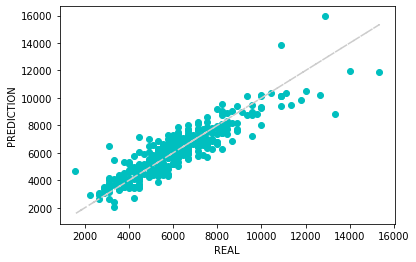

In [9]:
scatter_plot_and_save("Model", predictions_df["real_value"].values, predictions_df["prediction"].values)

0.8818181818181839


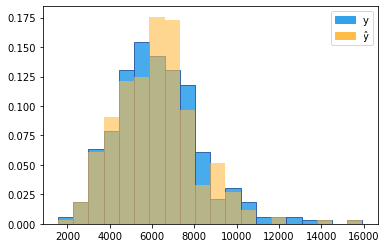

In [10]:
plot_and_save_histogram("Model", predictions_df["real_value"].values, predictions_df["prediction"].values, 20)

In [11]:
from sklearn.metrics import mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
mape = mean_absolute_percentage_error(predictions_df["real_value"].values, predictions_df["prediction"].values)
mae = mean_absolute_error(predictions_df["real_value"].values, predictions_df["prediction"].values)
print(f"MAPE: {mape} // MAE: {mae}")

MAPE: 12.302296144246142 // MAE: 702.1820364287405


# Análise dos folds

In [13]:
raw_fold_info_df = pd.read_csv(experiment_folder + "raw_fold_info.csv")
raw_fold_info_df.head()

,fold,epoch,train_loss,validation_loss
0,0,0,3.408164e+07,12123002.0
1,0,1,1.918566e+07,11466312.0
2,0,2,9.680728e+06,5555525.0
3,0,3,8.561649e+06,7105864.0
4,0,4,5.909214e+06,4383498.0


## Loss média de cada época do k-fold

In [14]:
def get_avg_validation_loss(raw_fold_info_df: pd.DataFrame) -> pd.DataFrame:
    
    folds = len(raw_fold_info_df["fold"].unique())

    new_df = raw_fold_info_df[["epoch", "train_loss", "validation_loss"]].groupby("epoch").sum()
    new_df["train_loss"] /= folds
    new_df["validation_loss"] /= folds

    return new_df

In [15]:
teste = get_avg_validation_loss(raw_fold_info_df)

In [16]:
teste.reset_index()

,epoch,train_loss,validation_loss
0,0,5.010354e+07,6.613092e+07
1,1,3.649123e+07,2.963681e+07
2,2,2.905486e+07,2.688306e+07
3,3,2.512689e+07,1.714086e+07
4,4,1.364565e+07,1.134880e+07
...,...,...,...
195,195,6.559707e+03,8.555376e+05
196,196,7.514261e+03,8.423667e+05
197,197,5.933850e+03,8.423230e+05
198,198,1.211493e+04,8.413545e+05


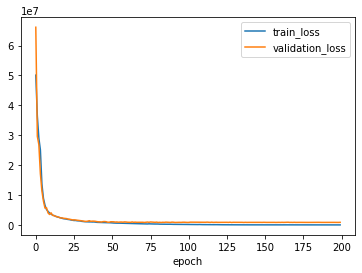

In [17]:
teste.plot()

## Analisando um fold em específico

In [18]:
fold = 1

In [19]:
fold_df = raw_fold_info_df[raw_fold_info_df["fold"] == fold]
fold_df.drop(columns="fold", inplace=True)
fold_df.set_index("epoch", inplace=True)
fold_df.head()

,train_loss,validation_loss
epoch,,
0,5.766780e+07,9919738.0
1,2.625875e+07,46810748.0
2,3.825478e+07,44380380.0
3,2.649232e+07,5755200.0
4,1.069499e+07,17414828.0


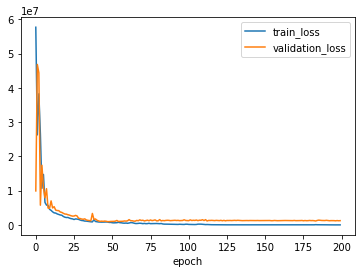

In [20]:
fold_df.plot()

## Métricas de cada fold

In [21]:
from typing import Tuple
from math import sqrt
from scipy.stats import pearsonr

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def get_metrics(real: Tuple, pred: Tuple) -> Tuple:
    unders = []
    overs = []
    for p in zip(pred, real):
        error = p[0] - p[1]
        if error > 0:
            overs.append(error)
        else:
            unders.append(error)
    
    n = len(real)

    # TODO: Usar métricas do sklearn...
    over = np.sum(overs)
    under = np.sum(unders)
    mean_error = (over + under) / n
    mean_abs_error = (over - under) / n
    mse = np.sum([e**2 for e in overs+unders])
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(real, pred)
    correlation = pearsonr(real, pred)[0]

    metrics = {"over": over, "under": under, "mean_error": mean_error,
               "MAE": mean_abs_error, "MSE": mse, "MAPE": mape, "RMSE": rmse, "Pearson Correlation": correlation}
    
    return metrics


In [22]:
def get_fold_metrics(folds: int, predictions_df: pd.DataFrame) -> pd.DataFrame:

    folds_metrics_df = pd.DataFrame(columns=["fold", "over", "under", "mean_error", "MAE", "MSE", "MAPE", "RMSE", "Pearson Correlation"])

    test_examples = len(predictions_df) // folds
    for i in range(folds):
        current_fold_predictions = predictions_df.iloc[i * test_examples: (i + 1) * test_examples]
        real, pred = current_fold_predictions["real_value"], current_fold_predictions["prediction"]
        metrics = get_metrics(real, pred)
        metrics["fold"] = i + 1

        folds_metrics_df = folds_metrics_df.append(metrics, ignore_index=True)

    return folds_metrics_df

In [23]:
fold_metrics_df = get_fold_metrics(10, predictions_df)

In [24]:
fold_metrics_df = fold_metrics_df.drop(columns=["over", "under"])
fold_metrics_df.set_index("fold", inplace=True)
fold_metrics_df

,mean_error,MAE,MSE,MAPE,RMSE,Pearson Correlation
fold,,,,,,
1.0,-368.761652,790.224025,4.091029e+07,12.085515,6396.115389,0.880163
2.0,-21.020545,829.979100,4.112862e+07,12.055966,6413.159895,0.904374
3.0,171.532693,628.114073,2.044724e+07,11.115723,4521.862133,0.915614
4.0,218.840887,824.212883,3.651392e+07,17.962199,6042.675007,0.801548
5.0,36.021595,524.160119,1.426910e+07,9.419623,3777.445839,0.948896
6.0,-114.177897,621.242824,2.141924e+07,10.552983,4628.092679,0.905418
7.0,-70.676958,513.641713,1.298985e+07,9.429584,3604.142804,0.947566
8.0,-103.270286,650.891365,1.951441e+07,11.039023,4417.512052,0.867898
9.0,-216.944092,1011.881296,5.346022e+07,14.488758,7311.649678,0.905084


In [25]:
for metric in fold_metrics_df.columns:
    print(f"{metric}: {fold_metrics_df[metric].mean()} +/- {fold_metrics_df[metric].std()}")

mean_error: -34.76972730232008 +/- 180.52210724195393
MAE: 702.1820364287405 +/- 157.18965694004902
MSE: 28741845.165676422 +/- 13507054.676605683
MAPE: 12.302296144246144 +/- 2.711303713432268
RMSE: 5228.620003945647 +/- 1248.7229120700522
Pearson Correlation: 0.8949400820696267 +/- 0.04290806105908508


# Comparando todos os experimentos

In [26]:
experiment_folder = "/home/kenzo/experiments/"

In [27]:
def get_all_experiments_avg_validation_loss(experiment_folder: str, show_model_names: bool = True):

    experiments_df = pd.DataFrame(columns=["epoch", "train_loss", "validation_loss", "model"])

    for experiment in os.listdir(experiment_folder):
        for root, dirs, files in os.walk(experiment_folder+experiment):
            for file_name in files:

                if "raw_fold_info.csv" in file_name:

                    raw_info_df = pd.read_csv(os.path.join(experiment_folder, experiment, file_name))
                    experiment_avg_loss = get_avg_validation_loss(raw_info_df).reset_index()
                    experiment_avg_loss["model"] = experiment

                    experiments_df = experiments_df.append(experiment_avg_loss, ignore_index=True)

    models = experiments_df["model"].unique()
    models.sort()
    aliases = {name: f"#{i}" for i, name in enumerate(models, start=1)}

    if not show_model_names:
        experiments_df.replace(aliases, inplace=True)
    
    return experiments_df, aliases

In [28]:
df, aliases = get_all_experiments_avg_validation_loss(experiment_folder, show_model_names=False)

In [29]:
aliases

{'alexnet-pretrained-50ep': '#1',
 'alexnet-pretrained-super_aug-200ep': '#2',
 'alexnet-pretrained-super_aug-50ep': '#3',
 'resnet18-pretrained-50ep': '#4',
 'resnet18-pretrained-super_aug-50ep': '#5',
 'vggnet11pretrained-50ep': '#6'}

In [30]:
df = df[["epoch", "validation_loss", "model"]]
# df = df[df["epoch"] < 10] # filtrando epocas
df.set_index("epoch", inplace=True)
df = df.pivot(columns="model")

Text(0.5, 0, 'Epochs')

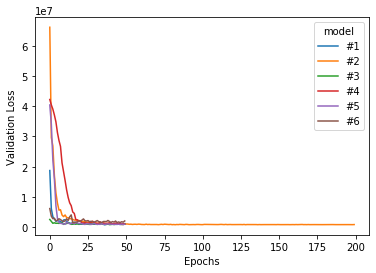

In [31]:
df["validation_loss"].plot()
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")